In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import random
import math


In [40]:
img1 = plt.imread('1.gif')
img2 = plt.imread('2.gif')
img3 = plt.imread('3.gif')
img4 = plt.imread('4.gif')
img1 = img1[:,:,0]
img2 = img2[:,:,0]
img3 = img3[:,:,0]
img4 = img4[:,:,0]
img = np.dstack((img1,img2,img3,img4))

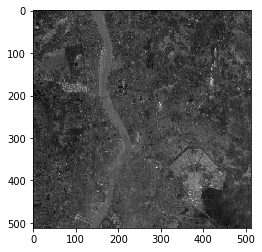

In [41]:
plt.imshow(img1,cmap='gray')


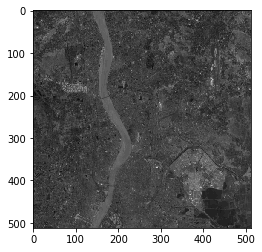

In [42]:
plt.imshow(img2,cmap='gray')

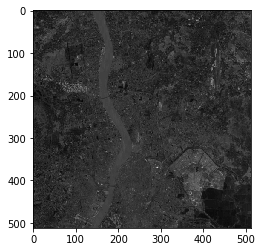

In [43]:
plt.imshow(img3,cmap='gray')

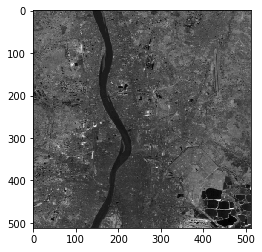

In [44]:
plt.imshow(img4,cmap='gray')

In [45]:
img1.shape

(512, 512)

In [46]:
label_img1 = plt.imread('PDCV1.jpeg')

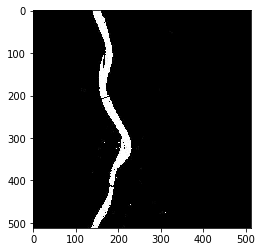

In [47]:
plt.imshow(label_img1,cmap='gray')


In [48]:
print(label_img1.shape)
print(label_img1[300][300])

(512, 512)
0


In [49]:
y = label_img1
y = (y>0.8*255)*1
non_river_pixel = np.sum(y==0)
river_pixel = np.sum(y==1)
print(non_river_pixel, river_pixel)

nonriv_msk = np.floor(np.random.rand(100)*non_river_pixel)
y = y.flatten()

             
nonriv = []
j = 0
for i in range(len(y)):
    if y[i] == 0:
        j+=1
        if j in nonriv_msk:
            nonriv.append(i)
            
cnt1=0
for j in range(512):
    if(1):
        cnt1 = cnt1 + 1
cnt2=0
for j in range(512):
    if(1):
        cnt2 = cnt2 + 1
        


252695 9449


In [50]:


riv_msk = np.floor(np.random.rand(50)*river_pixel)
riv = []
j = 0
for i in range(len(y)):
    if y[i] == 1:
        j+=1
        if j in riv_msk:
            riv.append(i)


In [51]:
X = img
cnt=0
X = X.reshape(-1,4)
river_class = X[riv]
nonriver_class = X[nonriv]
for k in range(4):
    for i in range(512*512):
        if(X[i][k]==0):
            cnt = cnt+1


In [52]:


cov_river = np.cov(river_class.T)
cov_nonriver = np.cov(nonriver_class.T)

print(cov_river, cov_nonriver)
t1 = np.mean(river_class, axis=0)
t2 = np.mean(nonriver_class, axis=0)
print(t1,t2)

nonriv = np.zeros(512*512)
for i in range(512*512):
    c = (X[i,:4]-t2).T
    b = np.linalg.inv(cov_nonriver)
    a = X[i,:4]-t2
    nonriv[i] = a@b@c
print(nonriv.shape)

riv = np.zeros(512*512)
for i in range(512*512):
    c= (X[i,:4]-t1).T
    b= np.linalg.inv(cov_river)
    a= (X[i,:4]-t1)
    riv[i] = a@b@c
print(riv.shape)

[[ 0.45153061  0.26743197  0.22151361  0.13095238]
 [ 0.26743197  0.53996599  0.41284014 -0.01785714]
 [ 0.22151361  0.41284014  0.91326531 -0.00892857]
 [ 0.13095238 -0.01785714 -0.00892857  1.45833333]] [[ 5.1930303   4.31464646  6.02070707  2.7320202 ]
 [ 4.31464646  4.67424242  6.13383838  4.99545455]
 [ 6.02070707  6.13383838 11.74494949  5.36212121]
 [ 2.7320202   4.99545455  5.36212121 30.26454545]]
[43.91836735 29.95918367 31.40816327 21.57142857] [40.33 25.45 26.15 34.41]
(262144,)
(262144,)


In [53]:
m = 100

c = np.exp(-1/2*nonriv)
b = np.sqrt(np.linalg.det(cov_nonriver)) 
a = ((np.sqrt(2*np.pi))**m)

p2 = 1/(  a *b )*c


m = 50
a = ((np.sqrt(2*np.pi))**m)
b = np.sqrt(np.linalg.det(cov_river))  
c = np.exp(-1/2*riv)
p1 = 1/(a*b )*c

print(p1)
print(p2)

[6.54541290e-097 3.27240088e-087 7.36685079e-100 ... 8.52312223e-061
 7.82932104e-078 8.58694077e-062]
[1.33986405e-42 2.14896809e-42 8.54957933e-43 ... 4.45016668e-43
 3.42848948e-43 1.63937399e-43]


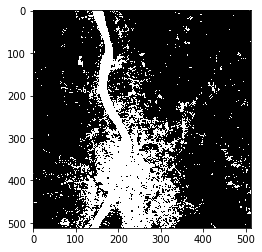

In [54]:
P1 = 0.5
P2 = 0.5

output_image = (P1*p1>=P2*p2)*255
plt.imshow(output_image.reshape(512,512),cmap="gray")
plt.show()

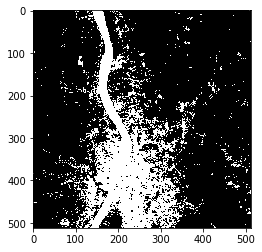

In [55]:
P1 = 0.4
P2 = 0.6

output_image = (P1*p1>=P2*p2)*255
plt.imshow(output_image.reshape(512,512),cmap="gray")
plt.show()

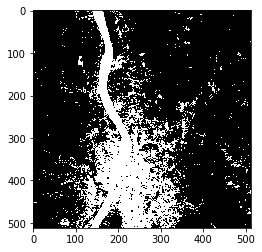

In [56]:
P1 = 0.3
P2 = 0.7

output_image = (P1*p1>=P2*p2)*255
plt.imshow(output_image.reshape(512,512),cmap="gray")
plt.show()

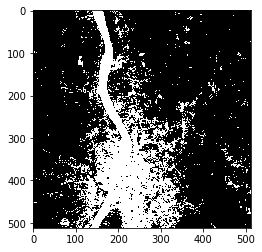

In [57]:
P1 = 0.7
P2 = 0.3

output_image = (P1*p1>=P2*p2)*255
plt.imshow(output_image.reshape(512,512),cmap="gray")
plt.show()